In [464]:
import numpy as np 
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
#To enable plotting graphs in Jupyter notebook

from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.ensemble import VotingRegressor

from scipy import stats
from scipy.stats import zscore
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.utils import resample

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc, roc_auc_score

                              
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA   

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import VotingRegressor
from scipy import stats
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error,mean_absolute_error 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans 
from sklearn.utils import resample

In [324]:
df1 = pd.read_csv('df1.csv') 
df1.drop('Unnamed: 0', axis=1, inplace=True) 
df1

,annual_inc,installment,int_rate,fico_avg,last_fico_avg,loan_amnt,revol_bal,open_acc,total_acc,loan_status
0,24000.0,162.87,10.65,737.0,737.0,5000.0,13648.0,3.0,9.0,1
1,30000.0,59.83,15.27,742.0,249.5,2500.0,1687.0,3.0,4.0,0
2,12252.0,84.33,15.96,737.0,737.0,2400.0,2956.0,2.0,10.0,1
3,49200.0,339.31,13.49,692.0,602.0,10000.0,5598.0,10.0,37.0,1
4,80000.0,67.79,12.69,697.0,682.0,3000.0,27783.0,15.0,38.0,1
...,...,...,...,...,...,...,...,...,...,...
42530,180000.0,113.39,10.28,687.0,817.0,3500.0,0.0,33.0,20.0,1
42531,12000.0,32.11,9.64,697.0,782.0,1000.0,0.0,33.0,20.0,1
42532,110000.0,80.69,9.33,712.0,712.0,2525.0,0.0,33.0,20.0,1
42533,60000.0,204.84,8.38,742.0,722.0,6500.0,0.0,33.0,20.0,1


In [325]:
df_dummies = pd.read_csv('df_dummies.csv') 
df_dummies.drop('Unnamed: 0', axis=1, inplace=True) 
df_dummies

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,issue_d,loan_status,dti,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,5000.0,0.0,10.65,162.87,6.0,10.0,24000.0,2011,1,27.65,...,0,0,0,0,0,0,0,0,0,0
1,2500.0,1.0,15.27,59.83,13.0,0.0,30000.0,2011,0,1.00,...,0,0,0,0,0,0,0,0,0,0
2,2400.0,0.0,15.96,84.33,14.0,10.0,12252.0,2011,1,8.72,...,0,0,0,0,0,0,0,0,0,0
3,10000.0,0.0,13.49,339.31,10.0,10.0,49200.0,2011,1,20.00,...,0,0,0,0,0,0,0,0,0,0
4,3000.0,1.0,12.69,67.79,9.0,1.0,80000.0,2011,1,17.94,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42530,3500.0,0.0,10.28,113.39,10.0,0.0,180000.0,2007,1,10.00,...,0,0,0,0,0,0,0,0,0,0
42531,1000.0,0.0,9.64,32.11,8.0,0.0,12000.0,2007,1,10.00,...,0,0,0,0,0,0,0,0,0,0
42532,2525.0,0.0,9.33,80.69,7.0,0.0,110000.0,2007,1,10.00,...,0,0,0,0,0,0,0,0,0,0
42533,6500.0,0.0,8.38,204.84,4.0,0.0,60000.0,2007,1,4.00,...,0,0,0,0,0,0,0,0,0,0


MODELOWANIE NA NAJWIĘKSZYM ZBIORZE

PRZYGOTOWANIE ZBIORÓW

In [326]:
X = df_dummies.drop('loan_status', axis=1)
Y = df_dummies['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [327]:
X_train.shape, X_test.shape

((29774, 97), (12761, 97))

In [328]:
y_train.shape, y_test.shape

((29774,), (12761,))

SKALOWANIE

In [329]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test

array([[-0.95313026, -0.59377133,  1.03360482, ..., -0.10937932,
        -0.06622215, -0.0456804 ],
       [-1.22287358, -0.59377133, -0.4798553 , ..., -0.10937932,
        -0.06622215, -0.0456804 ],
       [ 0.12584299, -0.59377133, -1.61360389, ..., -0.10937932,
        -0.06622215, -0.0456804 ],
       ...,
       [ 0.28768898, -0.59377133, -1.49241936, ..., -0.10937932,
        -0.06622215, -0.0456804 ],
       [ 0.66532962,  1.68415002,  2.08656372, ..., -0.10937932,
        -0.06622215, -0.0456804 ],
       [ 0.12584299, -0.59377133,  0.25533084, ..., -0.10937932,
        -0.06622215, -0.0456804 ]])

Regresja Logistyczna

In [330]:
log = LogisticRegression()

In [331]:
log.fit(X_train, y_train)

LogisticRegression()

In [332]:
log_pred = log.predict(X_test)

In [333]:
print(classification_report(y_test, log_pred))
print(confusion_matrix(y_test, log_pred))
print('Training accuracy:', log.score(X_train, y_train))
print('Test accuracy:', log.score(X_test, y_test)) 

              precision    recall  f1-score   support

           0       0.67      0.22      0.33      1978
           1       0.87      0.98      0.92     10783

    accuracy                           0.86     12761
   macro avg       0.77      0.60      0.63     12761
weighted avg       0.84      0.86      0.83     12761

[[  440  1538]
 [  215 10568]]
Training accuracy: 0.8658897024249345
Test accuracy: 0.8626283206645248


In [334]:
auroc_log = roc_auc_score(log_pred,y_test) 
print('AUROC =', auroc_log)

AUROC = 0.7723556422088347


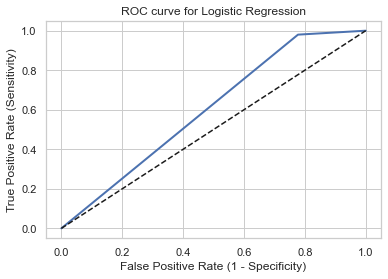

In [335]:
fpr, tpr, thresholds = roc_curve(y_test, log_pred) 
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' ) 
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Logistic Regression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

Drzewo Decyzyjne

In [336]:
dt = DecisionTreeClassifier()

In [337]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [338]:
dt_pred = dtree.predict(X_test)

In [342]:
def evaluate(prediction,y_test): 
    result = classification_report(y_test,prediction,output_dict=True)
    f1=result['0.0']['f1-score']
    accuracy = result['accuracy']
    performance_data= {'f1-score':round(f1, 2),
                      'accuracy':round(accuracy, 2)}
    return performance_data

In [339]:
print(classification_report(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))


print('Training accuracy:', dt.score(X_train, y_train))
print('Test accuracy:', dt.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.38      0.39      0.39      1978
           1       0.89      0.88      0.89     10783

    accuracy                           0.81     12761
   macro avg       0.63      0.64      0.64     12761
weighted avg       0.81      0.81      0.81     12761

[[ 771 1207]
 [1247 9536]]
Training accuracy: 1.0
Test accuracy: 0.8091842332105634


In [392]:
auroc_dt = roc_auc_score(dt_pred,y_test) 
print('AUROC =', auroc_dt)

AUROC = 0.6348546088092765


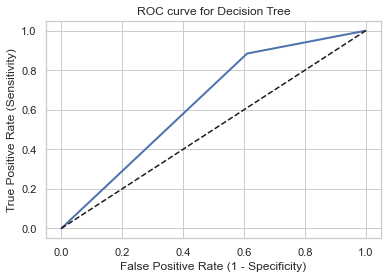

In [341]:
fpr, tpr, thresholds = roc_curve(y_test, dt_pred) 
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' ) 
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Decision Tree')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [343]:
for i in range(1,16):
  dtree = DecisionTreeClassifier(criterion="gini", max_depth=i, random_state= 101)
  dtree = dtree.fit(X_train,y_train)
  y_pred = dtree.predict(X_test)

  print("ACCURACY dla depth = ", i ," wynosi :",round(metrics.accuracy_score(y_test, y_pred), 4))

ACCURACY dla depth =  1  wynosi : 0.845
ACCURACY dla depth =  2  wynosi : 0.855
ACCURACY dla depth =  3  wynosi : 0.8598
ACCURACY dla depth =  4  wynosi : 0.8654
ACCURACY dla depth =  5  wynosi : 0.8592
ACCURACY dla depth =  6  wynosi : 0.8617
ACCURACY dla depth =  7  wynosi : 0.8562
ACCURACY dla depth =  8  wynosi : 0.8534
ACCURACY dla depth =  9  wynosi : 0.8506
ACCURACY dla depth =  10  wynosi : 0.8445
ACCURACY dla depth =  11  wynosi : 0.845
ACCURACY dla depth =  12  wynosi : 0.8418
ACCURACY dla depth =  13  wynosi : 0.8372
ACCURACY dla depth =  14  wynosi : 0.8344
ACCURACY dla depth =  15  wynosi : 0.8324


In [344]:
dtree = DecisionTreeClassifier(criterion="entropy", random_state= 101)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8152966068489931

In [345]:
dtree = DecisionTreeClassifier(criterion="gini", random_state= 101)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8047958623932294

In [346]:
for i in range(1,16):
  dtree = DecisionTreeClassifier(criterion="entropy", max_depth=i, random_state= 101)
  dtree = dtree.fit(X_train,y_train)
  y_pred = dtree.predict(X_test)

  print("Dokładnosc dla depth = ", i ," wynosi :",round(metrics.accuracy_score(y_test, y_pred), 4))

Dokładnosc dla depth =  1  wynosi : 0.845
Dokładnosc dla depth =  2  wynosi : 0.845
Dokładnosc dla depth =  3  wynosi : 0.8593
Dokładnosc dla depth =  4  wynosi : 0.8649
Dokładnosc dla depth =  5  wynosi : 0.8639
Dokładnosc dla depth =  6  wynosi : 0.8594
Dokładnosc dla depth =  7  wynosi : 0.8558
Dokładnosc dla depth =  8  wynosi : 0.8543
Dokładnosc dla depth =  9  wynosi : 0.8543
Dokładnosc dla depth =  10  wynosi : 0.8539
Dokładnosc dla depth =  11  wynosi : 0.8506
Dokładnosc dla depth =  12  wynosi : 0.8429
Dokładnosc dla depth =  13  wynosi : 0.8416
Dokładnosc dla depth =  14  wynosi : 0.8365
Dokładnosc dla depth =  15  wynosi : 0.8343


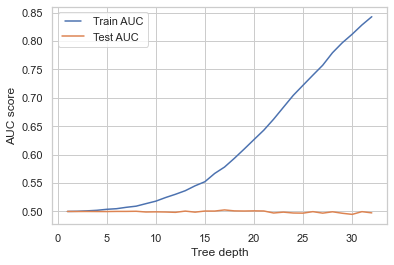

In [347]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, label= "Train AUC")
line2, = plt.plot(max_depths, test_results, label= "Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.show()

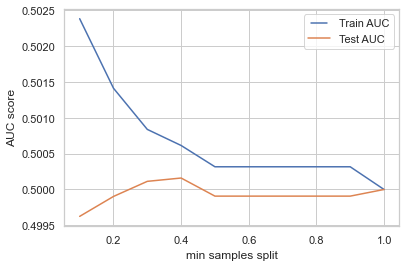

In [348]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples split")
plt.show()

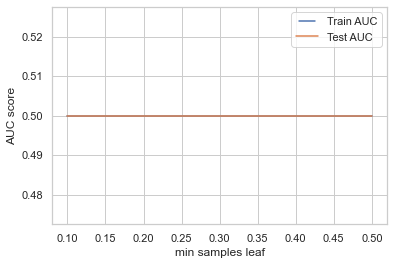

In [349]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples leaf")
plt.show()

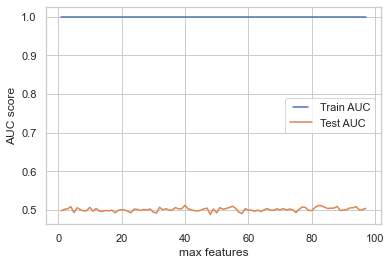

In [350]:
train_results = []
test_results = []
max_features = list(range(1,df_dummies.shape[1]))

for max_feature in max_features:
   dt = DecisionTreeClassifier(max_features=max_feature)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, label="Train AUC")
line2, = plt.plot(max_features, test_results, label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("max features")
plt.show()

In [351]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [356]:
model = DecisionTreeClassifier()

In [357]:
grid_param = {  
    'max_depth': [2, 4, 6, 8, 10, 12],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'criterion' : ['gini', 'entropy']
}

In [358]:
grid_search = GridSearchCV(estimator=model,  
                     param_grid=grid_param,
                     scoring='roc_auc')

In [359]:
grid_search.fit(X_train, y_train) 
 
best_parameters = grid_search.best_params_  
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 3, 'min_samples_leaf': 4}


In [360]:
dt1 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, max_features = 3, min_samples_leaf = 4)

In [361]:
dt1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features=3,
                       min_samples_leaf=4)

In [363]:
dt1_pred = dtree.predict(X_test)

In [364]:
# Summary of the prediction
print(classification_report(y_test, dt1_pred))
print(confusion_matrix(y_test, dt1_pred))

# Accuracy
print('Training accuracy:', dt1.score(X_train, y_train))
print('Test accuracy:', dt1.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.45      0.32      0.37      1978
           1       0.88      0.93      0.90     10783

    accuracy                           0.83     12761
   macro avg       0.67      0.62      0.64     12761
weighted avg       0.81      0.83      0.82     12761

[[  633  1345]
 [  769 10014]]
Training accuracy: 0.8510445355007725
Test accuracy: 0.8451532011597838


In [393]:
auroc_dt1 = roc_auc_score(dt1_pred,y_test) 
print('AUROC =', auroc_dt1)

AUROC = 0.6665447748044968


[Text(199.9832142857143, 205.35999999999999, 'X[1] <= 0.545\nentropy = 0.609\nsamples = 29774\nvalue = [4453, 25321]'),
 Text(114.34017857142857, 181.2, 'X[6] <= -0.394\nentropy = 0.535\nsamples = 22013\nvalue = [2682, 19331]'),
 Text(74.43321428571429, 157.04, 'X[4] <= -0.551\nentropy = 0.618\nsamples = 7734\nvalue = [1184, 6550]'),
 Text(37.067142857142855, 132.88, 'X[8] <= -1.577\nentropy = 0.462\nsamples = 3113\nvalue = [304, 2809]'),
 Text(16.740000000000002, 108.72, 'X[3] <= -0.602\nentropy = 0.56\nsamples = 267\nvalue = [35, 232]'),
 Text(7.174285714285714, 84.56, 'X[10] <= -2.952\nentropy = 0.425\nsamples = 185\nvalue = [16, 169]'),
 Text(4.782857142857143, 60.400000000000006, 'entropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(9.565714285714286, 60.400000000000006, 'X[11] <= 0.273\nentropy = 0.412\nsamples = 181\nvalue = [15, 166]'),
 Text(4.782857142857143, 36.24000000000001, 'X[15] <= -0.629\nentropy = 0.331\nsamples = 148\nvalue = [9, 139]'),
 Text(2.3914285714285715, 12

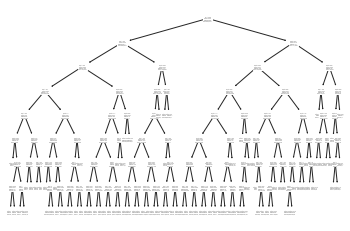

In [366]:
tree.plot_tree(dt1)

In [367]:
def get_depth(model): 
    check_is_fitted(self)
    return model.tree_.max_depth
print('The maximum depth of the tree', dt1.tree_.max_depth)

The maximum depth of the tree 8


RANDOM FOREST CLASSIFIER

In [368]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)

In [369]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [370]:
rf_prediction = rf.predict(X_test)

In [371]:
print(classification_report(y_test, rf_prediction)) 
print(confusion_matrix(y_test, rf_prediction))

print('Training accuracy:', rf.score(X_train, y_train)) 
print('Test accuracy:', rf.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.66      0.19      0.29      1978
           1       0.87      0.98      0.92     10783

    accuracy                           0.86     12761
   macro avg       0.77      0.59      0.61     12761
weighted avg       0.84      0.86      0.82     12761

[[  375  1603]
 [  191 10592]]
Training accuracy: 1.0
Test accuracy: 0.8594154063161195


In [372]:
confusion_matrix(y_test, rf_prediction)

array([[  375,  1603],
       [  191, 10592]])

In [373]:
auroc_rf = roc_auc_score(rf_prediction,y_test) 
print(auroc_rf)

0.7655484275690815


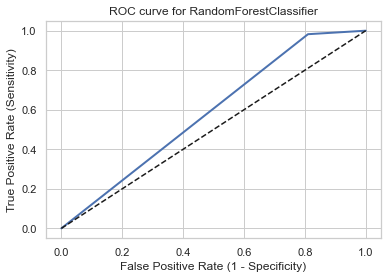

In [374]:
fpr, tpr, thresholds = roc_curve(y_test, rf_prediction) 
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' ) 
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RandomForestClassifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [375]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(3, 10, num = 8)]
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [1, 2, 3, 4, 5]
bootstrap = [True]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [1, 2, 3, 4, 5], 'bootstrap': [True]}


In [376]:
rf1 = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [377]:
rf1.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

In [379]:
rf1.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [380]:
rf1 = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=2, max_features='auto', bootstrap=True)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10)

In [381]:
rf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10)

In [382]:
rf1_prediction = rf1.predict(X_test)

In [383]:
print(classification_report(y_test,rf1_prediction))
print(confusion_matrix(y_test, rf1_prediction))
print('Training accuracy:', rf1.score(X_train, y_train))
print('Test accuracy:', rf1.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.77      0.02      0.03      1978
           1       0.85      1.00      0.92     10783

    accuracy                           0.85     12761
   macro avg       0.81      0.51      0.48     12761
weighted avg       0.84      0.85      0.78     12761

[[   34  1944]
 [   10 10773]]
Training accuracy: 0.8592731913750252
Test accuracy: 0.8468772039808793


In [384]:
auroc_rf1 = roc_auc_score(rf1_prediction,y_test) 
print(auroc_rf1)

0.809930515344528


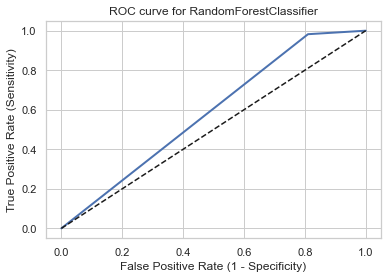

In [385]:
fpr, tpr, thresholds = roc_curve(y_test, rf_prediction) 
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' ) 
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RandomForestClassifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

SUPPORT VECTOR MACHINE (SVM)

In [254]:
from sklearn.svm import SVC

In [255]:
model = SVC()

In [256]:
model.fit(X_train,y_train)

SVC()

In [280]:
svm_prediction = model.predict(X_test)

In [260]:
result = classification_report(y_test,svm_prediction,output_dict=True)

In [261]:
print(classification_report(y_test,svm_prediction))
print(confusion_matrix(y_test, svm_prediction))
print('Training accuracy:', model.score(X_train, y_train))
print('Test accuracy:', model.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.72      0.12      0.20      1978
           1       0.86      0.99      0.92     10783

    accuracy                           0.86     12761
   macro avg       0.79      0.55      0.56     12761
weighted avg       0.84      0.86      0.81     12761

[[  232  1746]
 [   92 10691]]
Training accuracy: 0.8716329683616578
Test accuracy: 0.8559674006739284


In [262]:
auroc_svm = roc_auc_score(svm_prediction,y_test) 
print('AUROC =', auroc_svm)

AUROC = 0.7878309147237882


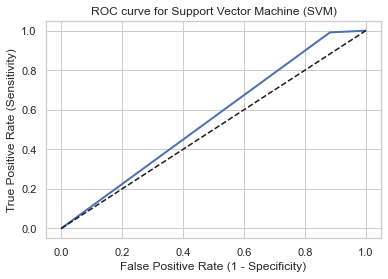

In [292]:
fpr, tpr, thresholds = roc_curve(y_test, svm_prediction) 
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Support Vector Machine (SVM)') 
plt.xlabel('False Positive Rate (1 - Specificity)') 
plt.ylabel('True Positive Rate (Sensitivity)') 
plt.show()

K NEAREST NEIGHBORS (KNN)

In [293]:
knn = KNeighborsClassifier(n_neighbors=2)

In [294]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [295]:
knn_prediction = knn.predict(X_test)

In [296]:
print(classification_report(y_test, knn_prediction)) 
print(confusion_matrix(y_test, knn_prediction))
print('Training accuracy:', knn.score(X_train, y_train))
print('Test accuracy:', knn.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.26      0.39      0.31      1978
           1       0.88      0.80      0.84     10783

    accuracy                           0.74     12761
   macro avg       0.57      0.59      0.58     12761
weighted avg       0.78      0.74      0.76     12761

[[ 768 1210]
 [2146 8637]]
Training accuracy: 0.9070329817961981
Test accuracy: 0.7370112060183371


In [297]:
auroc_knn = roc_auc_score(knn_prediction,y_test) 
print('AUROC =', auroc_knn)

AUROC = 0.5703375927601709


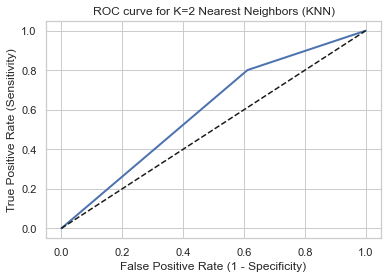

In [298]:
fpr, tpr, thresholds = roc_curve(y_test, knn_prediction) 
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for K=2 Nearest Neighbors (KNN)') 
plt.xlabel('False Positive Rate (1 - Specificity)') 
plt.ylabel('True Positive Rate (Sensitivity)') 
plt.show()

In [299]:
scores = []

for k in range(2, 11):
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train,y_train)
    knn_prediction = knn.predict(X_test) 
    scores.append(accuracy_score(knn_prediction,y_test)) 
    print('n_neighbors=', scores)

n_neighbors= [0.7370112060183371]
n_neighbors= [0.7370112060183371, 0.8294020844761383]
n_neighbors= [0.7370112060183371, 0.8294020844761383, 0.8155316981427788]
n_neighbors= [0.7370112060183371, 0.8294020844761383, 0.8155316981427788, 0.8413133766946164]
n_neighbors= [0.7370112060183371, 0.8294020844761383, 0.8155316981427788, 0.8413133766946164, 0.836219731995925]
n_neighbors= [0.7370112060183371, 0.8294020844761383, 0.8155316981427788, 0.8413133766946164, 0.836219731995925, 0.8453882924535695]
n_neighbors= [0.7370112060183371, 0.8294020844761383, 0.8155316981427788, 0.8413133766946164, 0.836219731995925, 0.8453882924535695, 0.8423321056343547]
n_neighbors= [0.7370112060183371, 0.8294020844761383, 0.8155316981427788, 0.8413133766946164, 0.836219731995925, 0.8453882924535695, 0.8423321056343547, 0.8465637489224982]
n_neighbors= [0.7370112060183371, 0.8294020844761383, 0.8155316981427788, 0.8413133766946164, 0.836219731995925, 0.8453882924535695, 0.8423321056343547, 0.8465637489224982,

In [301]:
error_rate = []

max_k = 10

for k in range(1, max_k):
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train,y_train)
    knn_prediction = knn.predict(X_test) 
    error_rate.append(np.mean(knn_prediction != y_test))
print(error_rate)

[0.20703706606065356, 0.26298879398166286, 0.17059791552386178, 0.1844683018572212, 0.15868662330538358, 0.1637802680040749, 0.15461170754643053, 0.15766789436564532, 0.15343625107750175]


Text(0, 0.5, 'Error Rate')

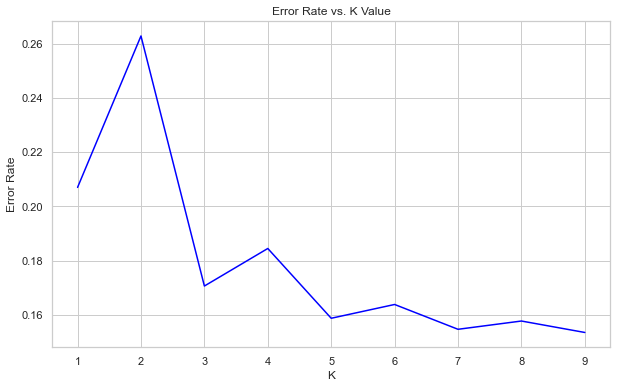

In [302]:
plt.figure(figsize=(10,6))
plt.plot(range(1, max_k), error_rate, color = 'blue') 
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [304]:
knn1 = KNeighborsClassifier(7)

In [305]:
knn1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [306]:
knn1_prediction = knn.predict(X_test)

In [307]:
print(classification_report(y_test, knn1_prediction)) 
print(confusion_matrix(y_test, knn1_prediction))
print('Training accuracy:', knn1.score(X_train, y_train))
print('Test accuracy:', knn1.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.55      0.06      0.11      1978
           1       0.85      0.99      0.92     10783

    accuracy                           0.85     12761
   macro avg       0.70      0.52      0.51     12761
weighted avg       0.80      0.85      0.79     12761

[[  115  1863]
 [   95 10688]]
Training accuracy: 0.8647813528581985
Test accuracy: 0.8453882924535695


In [308]:
auroc_knn1 = roc_auc_score(knn1_prediction,y_test) 
print('AUROC =', auroc_knn1)

AUROC = 0.6995923299604282


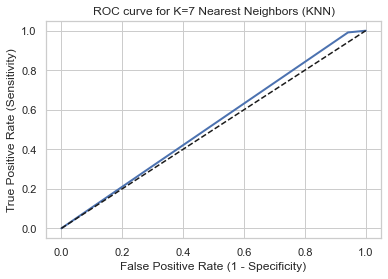

In [309]:
fpr, tpr, thresholds = roc_curve(y_test, knn1_prediction) 
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for K=7 Nearest Neighbors (KNN)') 
plt.xlabel('False Positive Rate (1 - Specificity)') 
plt.ylabel('True Positive Rate (Sensitivity)') 
plt.show()

BAGGING CLASSIFIER

In [311]:
xgbc = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))

In [312]:
xgbc.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1))

In [313]:
xgbc_prediction = xgbc.predict(X_test)

In [314]:
print(classification_report(y_test, xgbc_prediction)) 
print(confusion_matrix(y_test, xgbc_prediction))
print('Training accuracy:', xgbc.score(X_train, y_train))
print('Test accuracy:', xgbc.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.52      0.42      0.47      1978
           1       0.90      0.93      0.91     10783

    accuracy                           0.85     12761
   macro avg       0.71      0.68      0.69     12761
weighted avg       0.84      0.85      0.84     12761

[[  833  1145]
 [  759 10024]]
Training accuracy: 0.9943910794653052
Test accuracy: 0.8507953922106418


In [315]:
auroc_xgbc = roc_auc_score(xgbc_prediction,y_test) 
print('AUROC =', auroc_xgbc)

AUROC = 0.7103626569142607


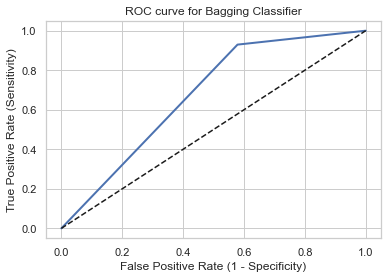

In [316]:
fpr, tpr, thresholds = roc_curve(y_test, xgbc_prediction) 
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Bagging Classifier') 
plt.xlabel('False Positive Rate (1 - Specificity)') 
plt.ylabel('True Positive Rate (Sensitivity)') 
plt.show()

GRADIENT BOOSTING CLASSIFIER

In [317]:
gbc= GradientBoostingClassifier(learning_rate=0.01, random_state=1)

In [318]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=1)

In [319]:
gbc_prediction = gbc.predict(X_test)

In [320]:
print(classification_report(y_test, gbc_prediction)) 
print(confusion_matrix(y_test, gbc_prediction))
print('Training accuracy:', gbc.score(X_train, y_train))
print('Test accuracy:', gbc.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.81      0.06      0.10      1978
           1       0.85      1.00      0.92     10783

    accuracy                           0.85     12761
   macro avg       0.83      0.53      0.51     12761
weighted avg       0.85      0.85      0.79     12761

[[  110  1868]
 [   26 10757]]
Training accuracy: 0.8575602874991604
Test accuracy: 0.8515790298565943


In [321]:
auroc_gbc = roc_auc_score(gbc_prediction,y_test) 
print('AUROC =', auroc_gbc)

AUROC = 0.8304315666860803


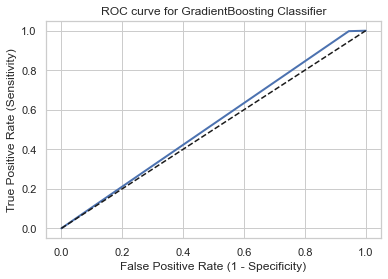

In [322]:
fpr, tpr, thresholds = roc_curve(y_test, gbc_prediction) 
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for GradientBoosting Classifier') 
plt.xlabel('False Positive Rate (1 - Specificity)') 
plt.ylabel('True Positive Rate (Sensitivity)') 
plt.show()

PORÓWNANIE WYNIKÓW NA ZBIORZE DUMMIES

In [394]:
results = pd.DataFrame({'Method':['Logistic Regression', 'Decision Tree', 'Decision Tree Param', 'Random Forrest', 
                                  'Random Forrest Param', 'SVM', 'KNN', 'KNN Param', 'Boosting Classifier', 'Gradient Boosting Classifier'],  
                        'AUROC': [auroc_log, auroc_dt, auroc_dt1, auroc_rf, auroc_rf1, auroc_svm, auroc_knn, auroc_knn1, auroc_xgbc, auroc_gbc]})

                          
results.sort_values(by = 'AUROC', ascending = False)

,Method,AUROC
9,Gradient Boosting Classifier,0.830432
4,Random Forrest Param,0.809931
5,SVM,0.787831
0,Logistic Regression,0.772356
3,Random Forrest,0.765548
8,Boosting Classifier,0.710363
7,KNN Param,0.699592
2,Decision Tree Param,0.666545
1,Decision Tree,0.634855
6,KNN,0.570338


MODELOWANIE NA ZBIORZE MAŁYM

In [398]:
df1 = pd.read_csv('df1.csv') 
df1.drop('Unnamed: 0', axis=1, inplace=True) 
df1

,annual_inc,installment,int_rate,fico_avg,last_fico_avg,loan_amnt,revol_bal,open_acc,total_acc,loan_status
0,24000.0,162.87,10.65,737.0,737.0,5000.0,13648.0,3.0,9.0,1
1,30000.0,59.83,15.27,742.0,249.5,2500.0,1687.0,3.0,4.0,0
2,12252.0,84.33,15.96,737.0,737.0,2400.0,2956.0,2.0,10.0,1
3,49200.0,339.31,13.49,692.0,602.0,10000.0,5598.0,10.0,37.0,1
4,80000.0,67.79,12.69,697.0,682.0,3000.0,27783.0,15.0,38.0,1
...,...,...,...,...,...,...,...,...,...,...
42530,180000.0,113.39,10.28,687.0,817.0,3500.0,0.0,33.0,20.0,1
42531,12000.0,32.11,9.64,697.0,782.0,1000.0,0.0,33.0,20.0,1
42532,110000.0,80.69,9.33,712.0,712.0,2525.0,0.0,33.0,20.0,1
42533,60000.0,204.84,8.38,742.0,722.0,6500.0,0.0,33.0,20.0,1


PRZYGOTOWANIE ZBIORÓW

In [399]:
X1 = df1.drop('loan_status', axis=1)
Y1 = df1['loan_status']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size = 0.3, random_state = 0)

SKALOWANIE

In [400]:
sc = StandardScaler()
X1_train = sc.fit_transform(X1_train) 
X1_test = sc.transform(X1_test)

GRADIENT BOOSTING CLASSIFIER

In [401]:
gbc= GradientBoostingClassifier(learning_rate=0.01, random_state=1)

In [402]:
gbc.fit(X1_train, y1_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=1)

In [403]:
gbc_prediction = gbc.predict(X1_test)

In [404]:
print(classification_report(y1_test, gbc_prediction)) 
print(confusion_matrix(y1_test, gbc_prediction))
print('Training accuracy:', gbc.score(X1_train, y_train))
print('Test accuracy:', gbc.score(X1_test, y_test))

              precision    recall  f1-score   support

           0       0.82      0.03      0.05      1978
           1       0.85      1.00      0.92     10783

    accuracy                           0.85     12761
   macro avg       0.83      0.51      0.49     12761
weighted avg       0.84      0.85      0.78     12761

[[   54  1924]
 [   12 10771]]
Training accuracy: 0.8533619936857662
Test accuracy: 0.8482877517435937


In [405]:
auroc_gbc = roc_auc_score(gbc_prediction,y1_test) 
print('AUROC =', auroc_gbc)

AUROC = 0.8333130437896094


RANDOM ROREST

In [406]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)

In [408]:
rf.fit(X1_train, y1_train)

RandomForestClassifier(random_state=0)

In [409]:
rf_prediction = rf.predict(X1_test)

In [415]:
print(classification_report(y1_test, rf_prediction)) 
print(confusion_matrix(y1_test, rf_prediction))
print('Training accuracy:', rf.score(X1_train, y1_train))
print('Test accuracy:', rf.score(X1_test, y1_test))

              precision    recall  f1-score   support

           0       0.59      0.31      0.41      1978
           1       0.88      0.96      0.92     10783

    accuracy                           0.86     12761
   macro avg       0.74      0.64      0.66     12761
weighted avg       0.84      0.86      0.84     12761

[[  614  1364]
 [  425 10358]]
Training accuracy: 1.0
Test accuracy: 0.8598072251390957


In [416]:
auroc_rf = roc_auc_score(rf_prediction,y1_test) 
print('AUROC =', auroc_rf)

AUROC = 0.7372952218864391


RANDOM FOREST Z PARAMETRAMI

In [412]:
rf1 = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=2, max_features='auto', bootstrap=True)

In [413]:
rf1.fit(X1_train, y1_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10)

In [414]:
rf1_prediction = rf1.predict(X1_test)

In [417]:
print(classification_report(y1_test, rf1_prediction)) 
print(confusion_matrix(y1_test, rf1_prediction))
print('Training accuracy:', rf1.score(X1_train, y1_train))
print('Test accuracy:', rf1.score(X1_test, y1_test))

              precision    recall  f1-score   support

           0       0.65      0.25      0.36      1978
           1       0.88      0.98      0.92     10783

    accuracy                           0.86     12761
   macro avg       0.76      0.61      0.64     12761
weighted avg       0.84      0.86      0.84     12761

[[  496  1482]
 [  268 10515]]
Training accuracy: 0.8922885739235574
Test accuracy: 0.8628634119583105


In [418]:
auroc_rf1 = roc_auc_score(rf1_prediction,y1_test) 
print('AUROC =', auroc_rf1)

AUROC = 0.7628418884825918


SVM

In [419]:
sv = SVC()

In [420]:
sv.fit(X1_train, y1_train)

SVC()

In [421]:
sv_prediction = sv.predict(X1_test)

In [422]:
print(classification_report(y1_test, sv_prediction)) 
print(confusion_matrix(y1_test, sv_prediction))
print('Training accuracy:', sv.score(X1_train, y1_train))
print('Test accuracy:', sv.score(X1_test, y1_test))

              precision    recall  f1-score   support

           0       0.67      0.17      0.27      1978
           1       0.87      0.98      0.92     10783

    accuracy                           0.86     12761
   macro avg       0.77      0.58      0.60     12761
weighted avg       0.84      0.86      0.82     12761

[[  337  1641]
 [  166 10617]]
Training accuracy: 0.8653859071673272
Test accuracy: 0.8583966773763811


In [423]:
auroc_sv = roc_auc_score(sv_prediction,y1_test) 
print('AUROC =', auroc_sv)

AUROC = 0.7680541810322596


REGRESJA LOGISTYCZNA

In [452]:
log = LogisticRegression()

In [453]:
log.fit(X1_train, y1_train)

LogisticRegression()

In [454]:
log_prediction = log.predict(X1_test)

In [455]:
print(classification_report(y1_test, log_prediction)) 
print(confusion_matrix(y1_test, log_prediction))
print('Training accuracy:', log.score(X1_train, y1_train))
print('Test accuracy:', log.score(X1_test, y1_test))

              precision    recall  f1-score   support

           0       0.65      0.19      0.29      1978
           1       0.87      0.98      0.92     10783

    accuracy                           0.86     12761
   macro avg       0.76      0.58      0.61     12761
weighted avg       0.83      0.86      0.82     12761

[[  372  1606]
 [  200 10583]]
Training accuracy: 0.862934103580305
Test accuracy: 0.8584750411409764


In [456]:
auroc_log = roc_auc_score(log_prediction,y1_test) 
print('AUROC =', auroc_log)

AUROC = 0.7592957538810357


Najlepsze wyniki są na modelu Gradient Boosting Classifier:

83.3% na małym zbiorze

83% na dużym zbiorze